<a href="https://colab.research.google.com/github/riyaz7781/Excel-R-assignments/blob/main/ExcelR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **STATEMENT :**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a
business to better understand its customers and makes it easier for them to modify products
according to the specific needs, behaviors and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers
from different types of customer segments. For example, instead of spending money to market a
new product to every customer in the company’s database, a company can analyze which customer
segment is most likely to buy the product and then market the product only on that particular
segment.


Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

Load the Dataset

In [2]:
data1=pd.read_excel("/content/Copy of marketing_campaign1 (1).xlsx")
data1.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


Basic Information about Dataset

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Checking for Null Values

In [4]:
data1.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Dropping Null Values

In [5]:
data1=data1.dropna()
data1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [6]:
data1.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
data1.Response.unique()

array([1, 0])

In [8]:
data1["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
data1["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Checking for Duplicated Values

In [10]:
data1.duplicated().sum()

0

Converting the column into Date Format

In [11]:
data1["Dt_Customer"]=pd.to_datetime(data1["Dt_Customer"])
print(max(data1["Dt_Customer"]))
print(min(data1["Dt_Customer"]))

2014-06-29 00:00:00
2012-07-30 00:00:00


Creating the new features by using existing features to get detailed understanding

In [12]:
data1['Age'] = 2015 - data1['Year_Birth']
data1['Spent'] = data1['MntWines'] + data1['MntFruits'] + data1['MntMeatProducts'] + data1['MntFishProducts'] + data1['MntSweetProducts'] + data1['MntGoldProds']
data1['Living_With'] = data1['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})
data1['Children'] = data1['Kidhome'] + data1['Teenhome']
data1['Family_Size'] = data1['Living_With'].replace({'Alone': 1, 'Partner':2}) + data1['Children']
data1['Is_Parent'] = np.where(data1.Children > 0, 1, 0)
data1['Education'] = data1['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

Dropping the UN-wanted Columns

In [14]:
data2=data1.drop(['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'],axis=1)
data2.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,422,Partner,1,3,1


In [15]:
data2.shape

(2216, 29)

In [16]:
data2.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,46.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2525.000000,3.000000,5.000000,1.000000


In [17]:
data2.describe(include=object).T

,count,unique,top,freq
Education,2216,3,Graduate,1116
Living_With,2216,2,Partner,1430


Visualisation

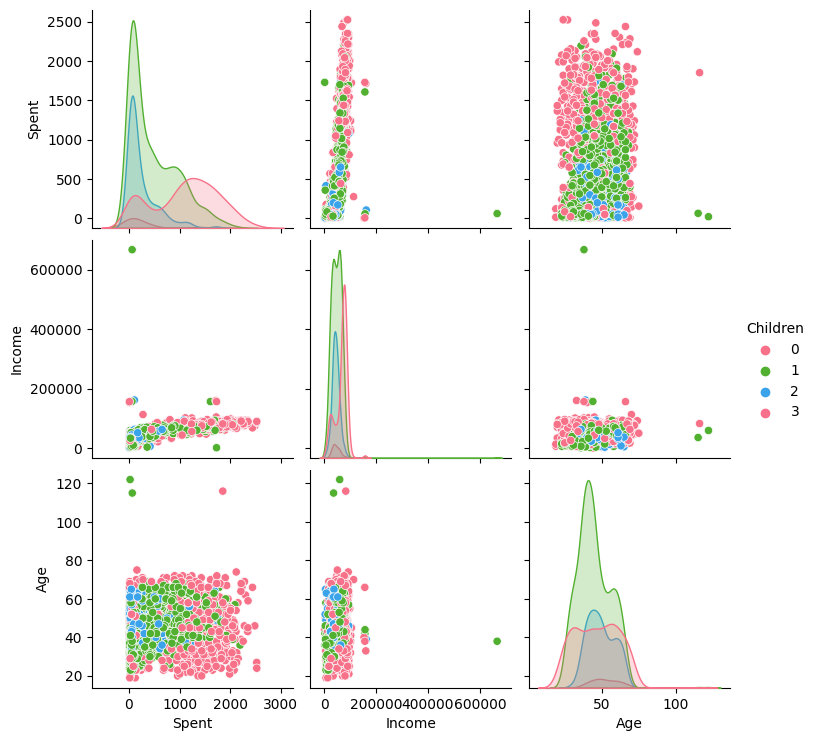

In [18]:
sns.pairplot(data2 , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

**INCOME VS SPENT**

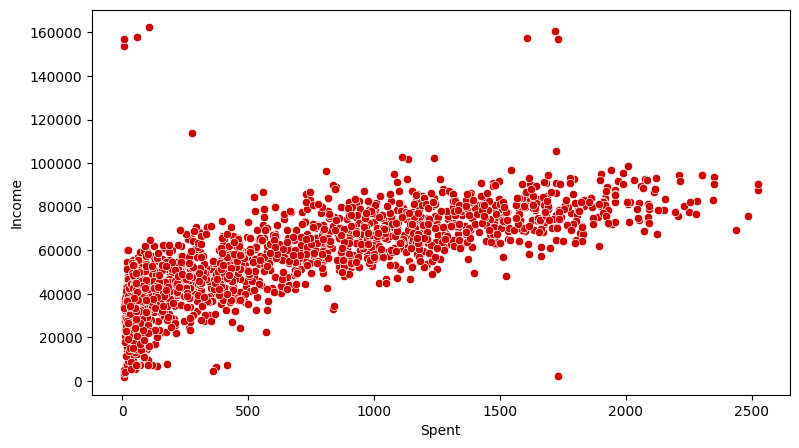

In [19]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=data2[data2['Income']<600000]['Spent'], y=data2[data2['Income']<600000]['Income'], color='#cc0000');

**AGE VS SPENT**

<Axes: xlabel='Spent', ylabel='Age'>

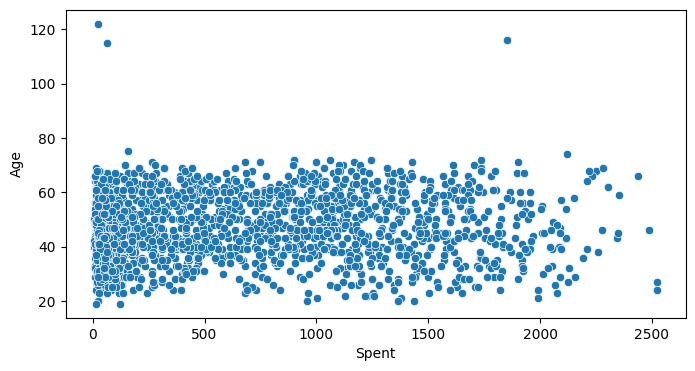

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=data2['Spent'], y=data2['Age'])

**EDUCATION VS SPENT**

<Axes: xlabel='Spent', ylabel='Count'>

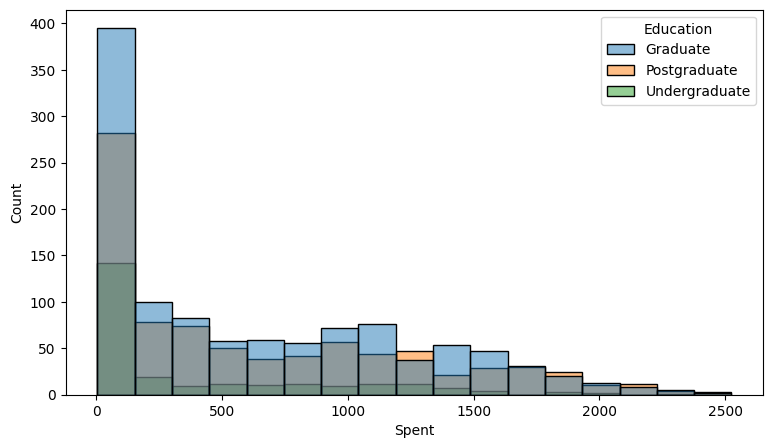

In [21]:
plt.figure(figsize=(9,5))
sns.histplot(x=data2['Spent'], hue=data2['Education'])

**PIE CHART TO SHOW THE TOTAL SPENT**



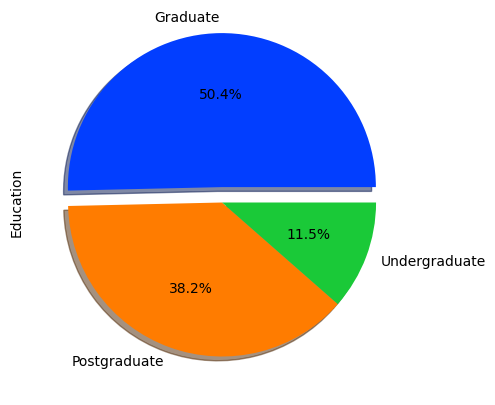

In [22]:
data2['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(5,5), colors=sns.color_palette('bright'));


**OUTLIER DETECTION**

<Axes: xlabel='Age', ylabel='Density'>

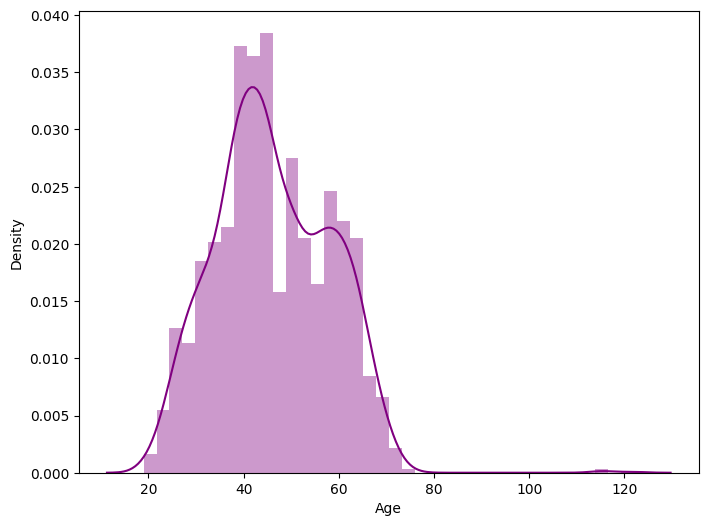

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(data2.Age, color='purple')

<Axes: xlabel='Spent', ylabel='Density'>

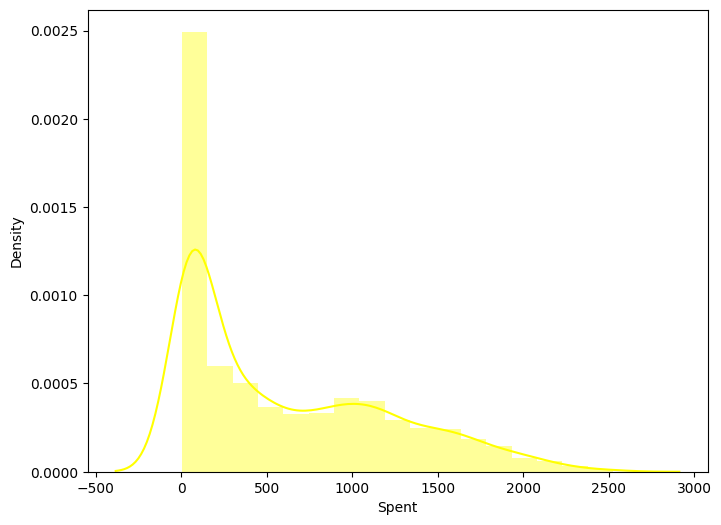

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(data2.Spent, color='yellow')

<Axes: xlabel='Income', ylabel='Density'>

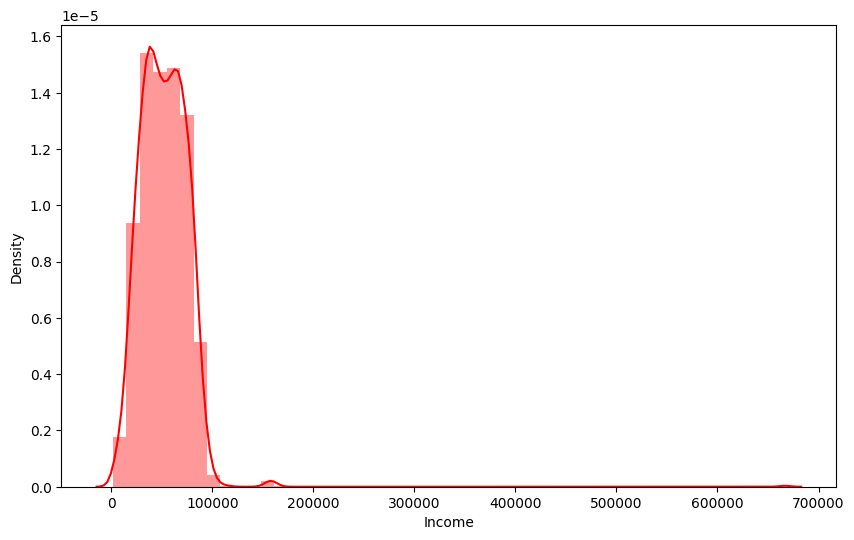

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(data2.Income, color='red')

Another way to detect outliers are using Box and whisker plots

In [26]:
numerical = ['Income', 'Recency', 'Age', 'Spent']
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data2[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data2[i][(data2[i] > ul) | (data2[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [27]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



Dropping the outlier values

In [28]:
data2 = data2[(data2['Age']<100)]
data2= data2[(data2['Income']<600000)]
data2.shape

(2212, 29)

**ENCODING THE VARIABLES**

In [29]:
categorical = [var for var in data2.columns if data2[var].dtype=='O']

In [30]:
data2['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

Here we are giving the orders as we know Education is Ordinal

In [31]:
data2['Education'] = data2['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})
data2['Living_With'] = data2['Living_With'].map({'Alone':0,'Partner':1})

In [32]:
data2["Education"] = data2["Education"].astype({"Education":"int"})

In [33]:
data2.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Spent                    int64
Living_With              int64
Children                 int64
Family_Size              int64
Is_Parent                int64
dtype: object

<Axes: >

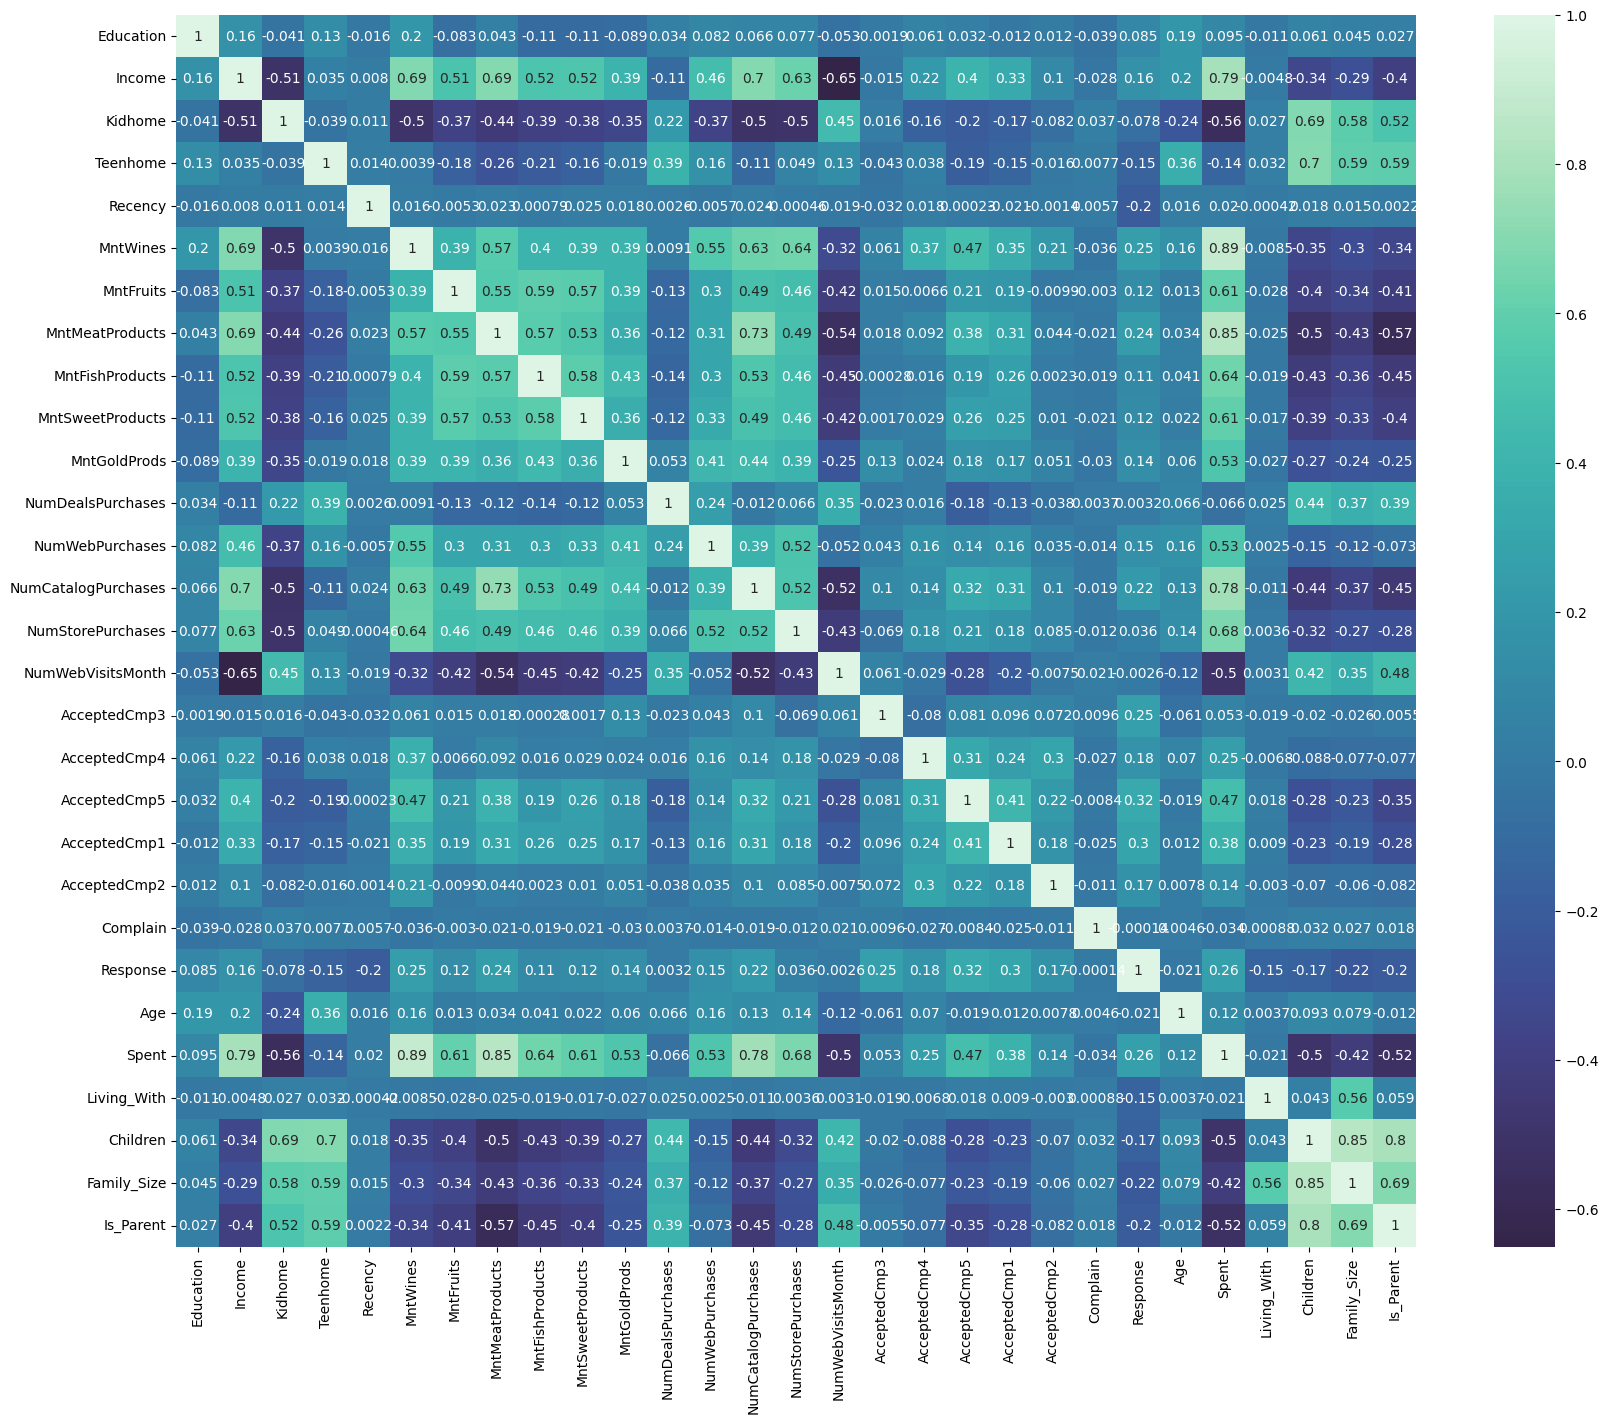

In [34]:
corrmat = data2.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

Feature Scaling the Values

In [35]:
data_old = data2.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data3 = data2.drop(cols_del, axis=1)
scaler = StandardScaler()
data4 = pd.DataFrame(scaler.fit_transform(data3), columns = data3.columns)
data4.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139


In [36]:
from sklearn.decomposition import PCA

In [37]:
p = PCA(n_components=3)
p.fit(data4)

PCA(n_components=3)

In [38]:
W = p.components_.T
W

array([[ 1.13473070e-02,  1.40728993e-01, -5.06752672e-01],
       [ 2.79487020e-01,  1.78225112e-01, -7.54906779e-02],
       [-2.46222811e-01,  5.21425861e-03,  2.82750603e-01],
       [-9.87087570e-02,  4.62113330e-01, -1.51436395e-01],
       [ 3.52658238e-03,  1.62584073e-02,  3.59713699e-02],
       [ 2.55717114e-01,  2.09388466e-01, -1.16830355e-01],
       [ 2.38398034e-01,  1.10670250e-02,  2.54570171e-01],
       [ 2.85462087e-01,  9.91772557e-03,  7.66603893e-02],
       [ 2.48709676e-01,  2.52448183e-04,  2.53592466e-01],
       [ 2.37301806e-01,  2.16332303e-02,  2.57653399e-01],
       [ 1.88380378e-01,  1.23084187e-01,  1.99444345e-01],
       [-7.82600451e-02,  3.48743212e-01,  1.52613375e-01],
       [ 1.67559632e-01,  2.96756938e-01,  2.25628440e-02],
       [ 2.77349189e-01,  1.05968150e-01,  1.67002499e-02],
       [ 2.41542865e-01,  2.05478714e-01, -7.21685932e-03],
       [-2.25949372e-01,  4.61127307e-02,  9.11426470e-02],
       [ 3.84647043e-02,  2.34778844e-01

In [40]:
pd.DataFrame(W, index=data4.columns, columns=['W1','W2','W3'])

,W1,W2,W3
Education,0.011347,0.140729,-0.506753
Income,0.279487,0.178225,-0.075491
Kidhome,-0.246223,0.005214,0.282751
Teenhome,-0.098709,0.462113,-0.151436
Recency,0.003527,0.016258,0.035971
MntWines,0.255717,0.209388,-0.116830
MntFruits,0.238398,0.011067,0.254570
MntMeatProducts,0.285462,0.009918,0.076660
MntFishProducts,0.248710,0.000252,0.253592
MntSweetProducts,0.237302,0.021633,0.257653


In [41]:
p.explained_variance_

array([8.27465625, 2.92091448, 1.43060396])

In [44]:
p.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.06499806])

In [45]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

,Explained Variability
1,0.375951
2,0.132709
3,0.064998


In [46]:
p.explained_variance_ratio_.cumsum()

array([0.3759507 , 0.50865952, 0.57365758])

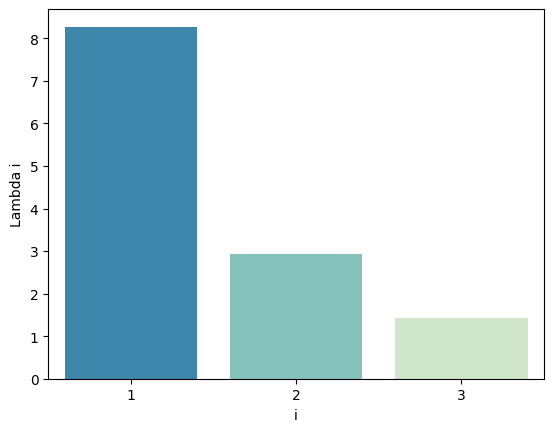

In [47]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [48]:
data_PCA = pd.DataFrame(p.transform(data4), columns=(['col1', 'col2', 'col3']))
data_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,8.351768e-17,2.876570,-5.915030,-2.548037,-0.784932,2.418554,7.441146
col2,2212.0,-1.284887e-17,1.709068,-4.398437,-1.343417,-0.133301,1.243020,6.248147
col3,2212.0,1.927331e-17,1.196080,-3.542751,-0.864316,-0.015699,0.824784,5.037115


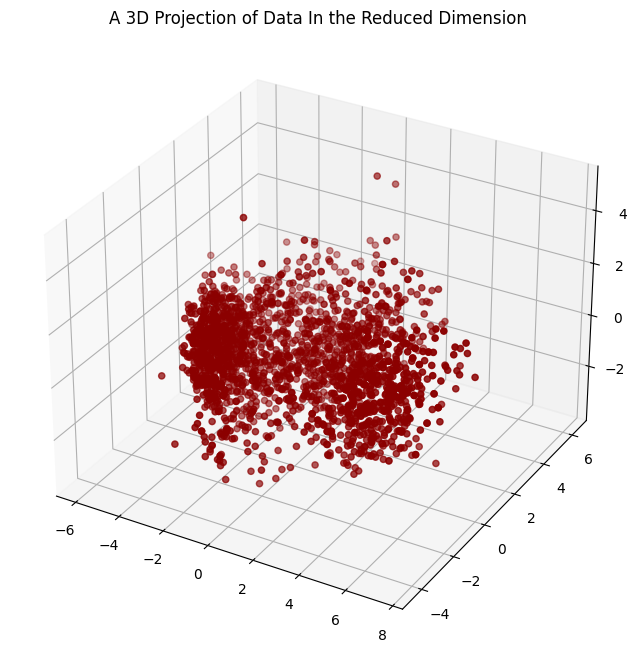

In [50]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

In [56]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
kmeans=KMeans(n_clusters=14,random_state=42)
kmeans.fit(data4)

KMeans(n_clusters=14, random_state=42)

In [57]:
kmeans.inertia_

20360.534997172515

In [58]:
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(data4)
  wcss.append(kmeans.inertia_)

In [59]:
wcss

[51432.542495479196,
 36987.75538067908,
 30479.894548864948,
 27790.49050898388,
 26375.025746183263,
 25310.772643765835,
 24223.949902540426,
 23368.713608395225,
 22548.282983914825,
 22089.351068286633,
 21570.46474994286,
 21112.90307471912,
 20719.441360480298,
 20215.669856587156]

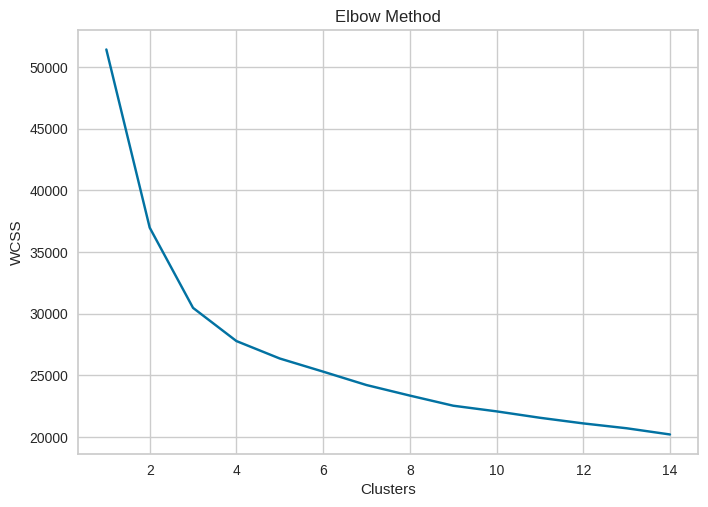

In [60]:
plt.plot(range(1,15),wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

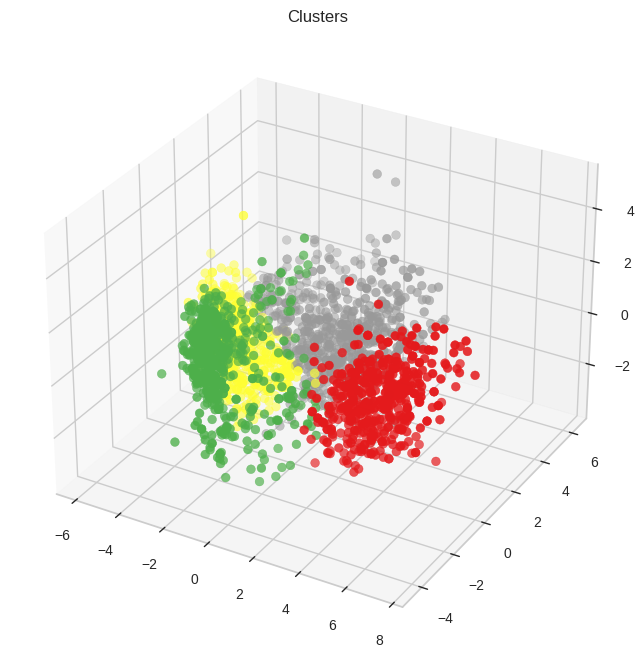

In [61]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data4['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()